Problem Statement :- PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


**Necessary Library Import**

In [1]:
!pip install scikeras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score,train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import MaxNorm
from scikeras.wrappers import KerasRegressor
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import mutual_info_regression

**Data Import**

In [3]:
forfire_df = pd.read_csv("forestfires.csv")
forfire_df.head(3)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small


In [4]:
forfire_df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

**Data Exploration**
In Data Analysis I will analyze to find out the following
1. Missing values
2. Duplicate Values
3. For all Numerical as well as Categorical Features i will check the distribution, cardinality of their values

In [5]:
forfire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

1. Missing Value

In [6]:
forfire_df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

* Our Dataset doesn't have Null Value

**2. Duplicate Values**

In [7]:
duplicate_entries = forfire_df[forfire_df.duplicated()]
duplicate_entries

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
duplicate_entries.shape

(8, 31)

* So we do have 8 duplicate entries in our data set

**Data Type Distribution:-**

In [9]:
numerical_features = [feature for feature in forfire_df.columns if forfire_df[feature].dtype != 'object']
print(f"The number of Numerical Features in the Dataset is {len(numerical_features)}")
categorical_features = [feature for feature in forfire_df.columns if forfire_df[feature].dtype == 'object']
print(f"The number of Categorical Features in the Dataset is {len(categorical_features)}")

The number of Numerical Features in the Dataset is 28
The number of Categorical Features in the Dataset is 3


**4.EDA**

In [10]:
for feature in categorical_features:
  print(forfire_df[feature].value_counts())
  print("\n\n")

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64



sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64



small    378
large    139
Name: size_category, dtype: int64





In [11]:
for feature in numerical_features:
  if len(forfire_df[feature].unique()) < 24:   # Here i am trying to have an overview of disctere columns only as per data
      print(forfire_df[feature].value_counts())
      print("\n")

3.1    53
2.2    53
4.0    51
4.9    48
2.7    44
5.4    41
4.5    41
3.6    40
1.8    31
5.8    24
6.3    19
1.3    14
7.6    14
0.9    13
8.5     8
6.7     8
8.0     5
7.2     4
9.4     4
8.9     1
0.4     1
Name: wind, dtype: int64


0.0    509
0.2      2
0.8      2
1.0      1
6.4      1
0.4      1
1.4      1
Name: rain, dtype: int64


0    432
1     85
Name: dayfri, dtype: int64


0    443
1     74
Name: daymon, dtype: int64


0    433
1     84
Name: daysat, dtype: int64


0    422
1     95
Name: daysun, dtype: int64


0    456
1     61
Name: daythu, dtype: int64


0    453
1     64
Name: daytue, dtype: int64


0    463
1     54
Name: daywed, dtype: int64


0    508
1      9
Name: monthapr, dtype: int64


0    333
1    184
Name: monthaug, dtype: int64


0    508
1      9
Name: monthdec, dtype: int64


0    497
1     20
Name: monthfeb, dtype: int64


0    515
1      2
Name: monthjan, dtype: int64


0    485
1     32
Name: monthjul, dtype: int64


0    500
1     17
Name: monthjun, dt

In [12]:
for feature in categorical_features:
  print(round((forfire_df[feature].value_counts()*100/(len(forfire_df))),2).astype('str')+' %')
  print("\n\n")

aug    35.59 %
sep    33.27 %
mar    10.44 %
jul     6.19 %
feb     3.87 %
jun     3.29 %
oct      2.9 %
apr     1.74 %
dec     1.74 %
jan     0.39 %
may     0.39 %
nov     0.19 %
Name: month, dtype: object



sun    18.38 %
fri    16.44 %
sat    16.25 %
mon    14.31 %
tue    12.38 %
thu     11.8 %
wed    10.44 %
Name: day, dtype: object



small    73.11 %
large    26.89 %
Name: size_category, dtype: object





In [13]:
for feature in numerical_features:
  if len(forfire_df[feature].unique()) < 24:
       print(round((forfire_df[feature].value_counts()*100/(len(forfire_df))),2).astype('str')+' %')
       print("\n")

3.1    10.25 %
2.2    10.25 %
4.0     9.86 %
4.9     9.28 %
2.7     8.51 %
5.4     7.93 %
4.5     7.93 %
3.6     7.74 %
1.8      6.0 %
5.8     4.64 %
6.3     3.68 %
1.3     2.71 %
7.6     2.71 %
0.9     2.51 %
8.5     1.55 %
6.7     1.55 %
8.0     0.97 %
7.2     0.77 %
9.4     0.77 %
8.9     0.19 %
0.4     0.19 %
Name: wind, dtype: object


0.0    98.45 %
0.2     0.39 %
0.8     0.39 %
1.0     0.19 %
6.4     0.19 %
0.4     0.19 %
1.4     0.19 %
Name: rain, dtype: object


0    83.56 %
1    16.44 %
Name: dayfri, dtype: object


0    85.69 %
1    14.31 %
Name: daymon, dtype: object


0    83.75 %
1    16.25 %
Name: daysat, dtype: object


0    81.62 %
1    18.38 %
Name: daysun, dtype: object


0    88.2 %
1    11.8 %
Name: daythu, dtype: object


0    87.62 %
1    12.38 %
Name: daytue, dtype: object


0    89.56 %
1    10.44 %
Name: daywed, dtype: object


0    98.26 %
1     1.74 %
Name: monthapr, dtype: object


0    64.41 %
1    35.59 %
Name: monthaug, dtype: object


0    98.26 %
1    

In [14]:
for feature in categorical_features:
  print(f"The Cardinality of {feature} is {len(forfire_df[feature].unique())} \n")

The Cardinality of month is 12 

The Cardinality of day is 7 

The Cardinality of size_category is 2 



In [15]:
for feature in numerical_features:
  if len(forfire_df[feature].unique()) < 24: ## Similar to previous Data Exploration of Numerical Features i am only interseted in discrete numerical variable here
      print(f"The Cardinality of {feature} is {len(forfire_df[feature].unique())}\n")

The Cardinality of wind is 21

The Cardinality of rain is 7

The Cardinality of dayfri is 2

The Cardinality of daymon is 2

The Cardinality of daysat is 2

The Cardinality of daysun is 2

The Cardinality of daythu is 2

The Cardinality of daytue is 2

The Cardinality of daywed is 2

The Cardinality of monthapr is 2

The Cardinality of monthaug is 2

The Cardinality of monthdec is 2

The Cardinality of monthfeb is 2

The Cardinality of monthjan is 2

The Cardinality of monthjul is 2

The Cardinality of monthjun is 2

The Cardinality of monthmar is 2

The Cardinality of monthmay is 2

The Cardinality of monthnov is 2

The Cardinality of monthoct is 2

The Cardinality of monthsep is 2



**Inference from the Data Exploration are following**-
1. No Null in Dataset
2. 8 Duplicate values are present in the Data set at indices 53,100,215,303,426,461,501 and 508
3. It seems that features like 'monthsep', 'monthoct'  etc. are nothing but the dummy for feature 'month'
similarly features like 'daythu', 'daytue' etc are nothing but the dummy for feature 'day'

> Note :- Inference number 3 is made after comparing the cardinality, Percent Distribution and Counts.



Step 4 :- Data Visualization

In [16]:
forfire_df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [17]:
visual_df = pd.DataFrame(forfire_df,columns=['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','size_category','rain', 'area'])
visual_df.head(3)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,size_category,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,small,0.0,0.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,small,0.0,0.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,small,0.0,0.0


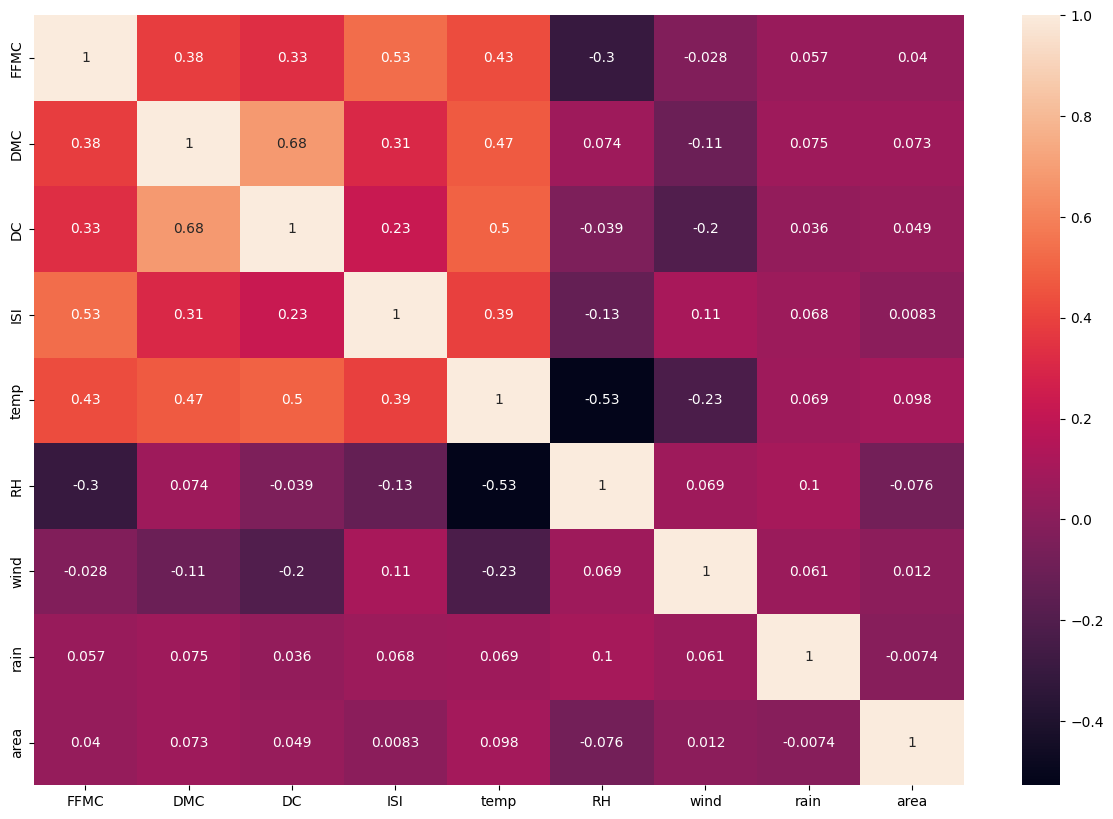

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(visual_df.corr(),annot=True)
plt.show()

<Figure size 1000x800 with 0 Axes>

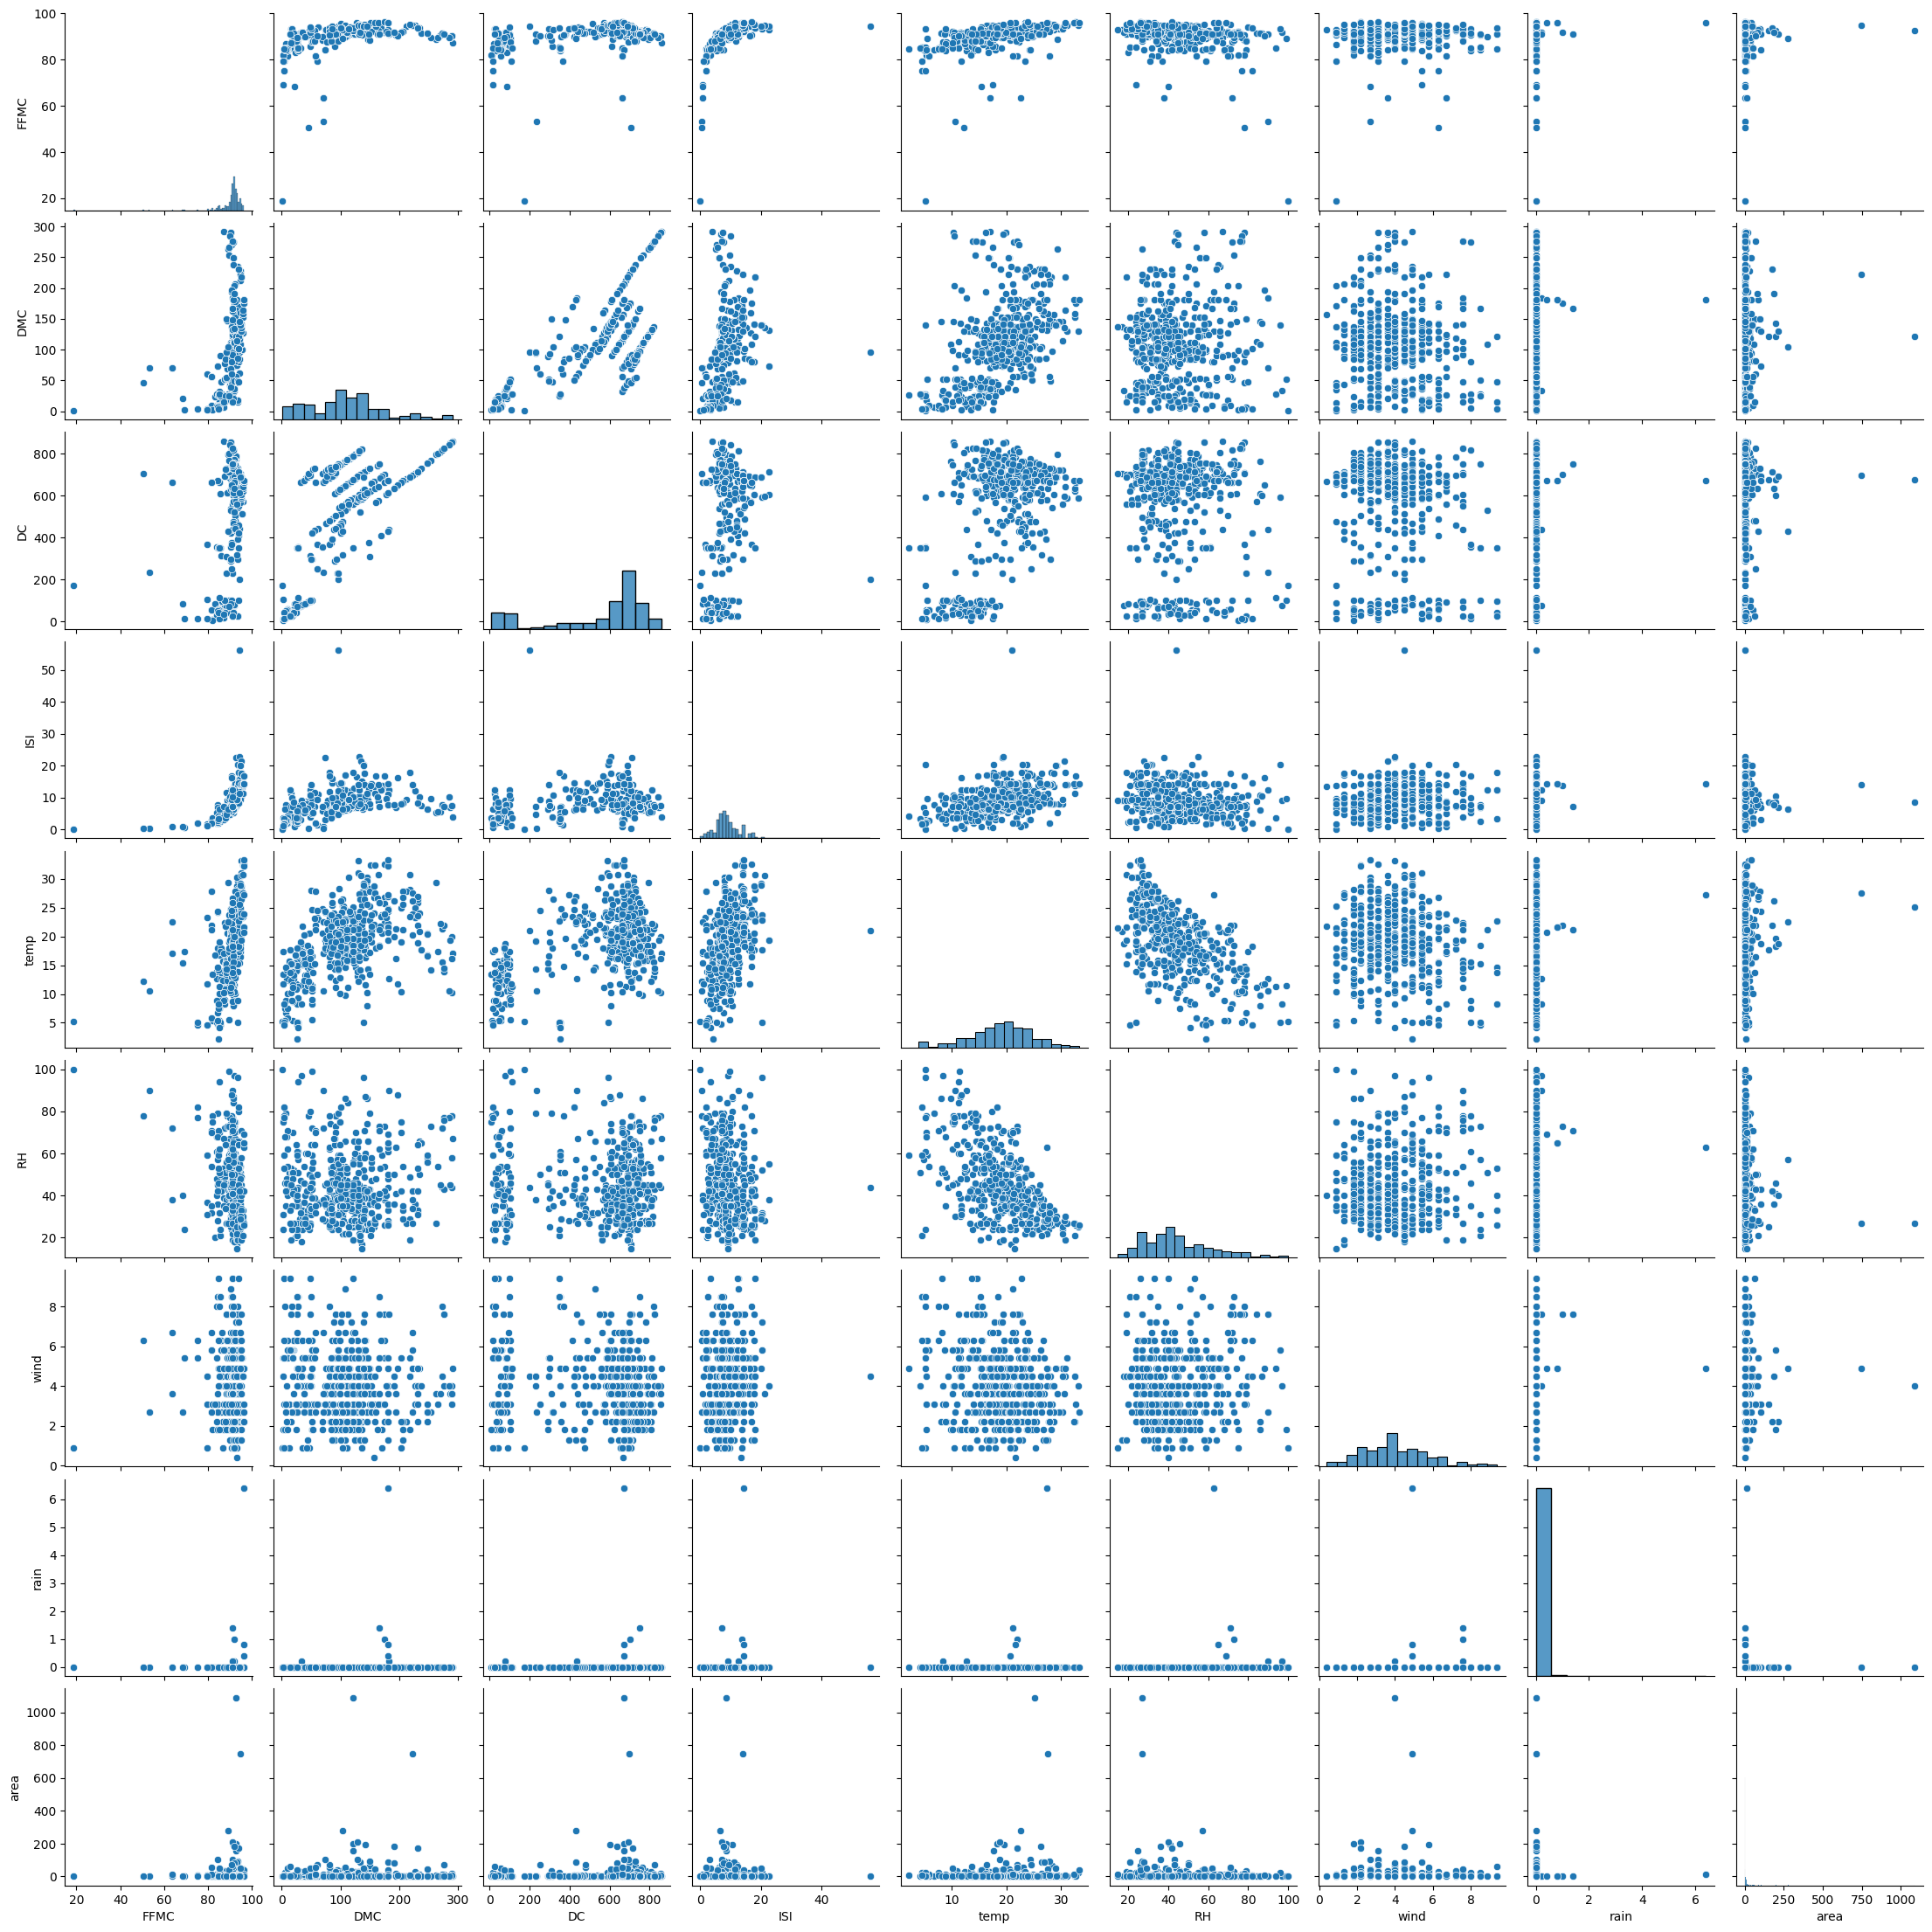

In [19]:
plt.figure(figsize=(10,8))
sns.pairplot(visual_df)
plt.show()

## Now i will Visually analyze the categorical features

In [19]:
visual_df.head(3)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,size_category,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,small,0.0,0.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,small,0.0,0.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,small,0.0,0.0


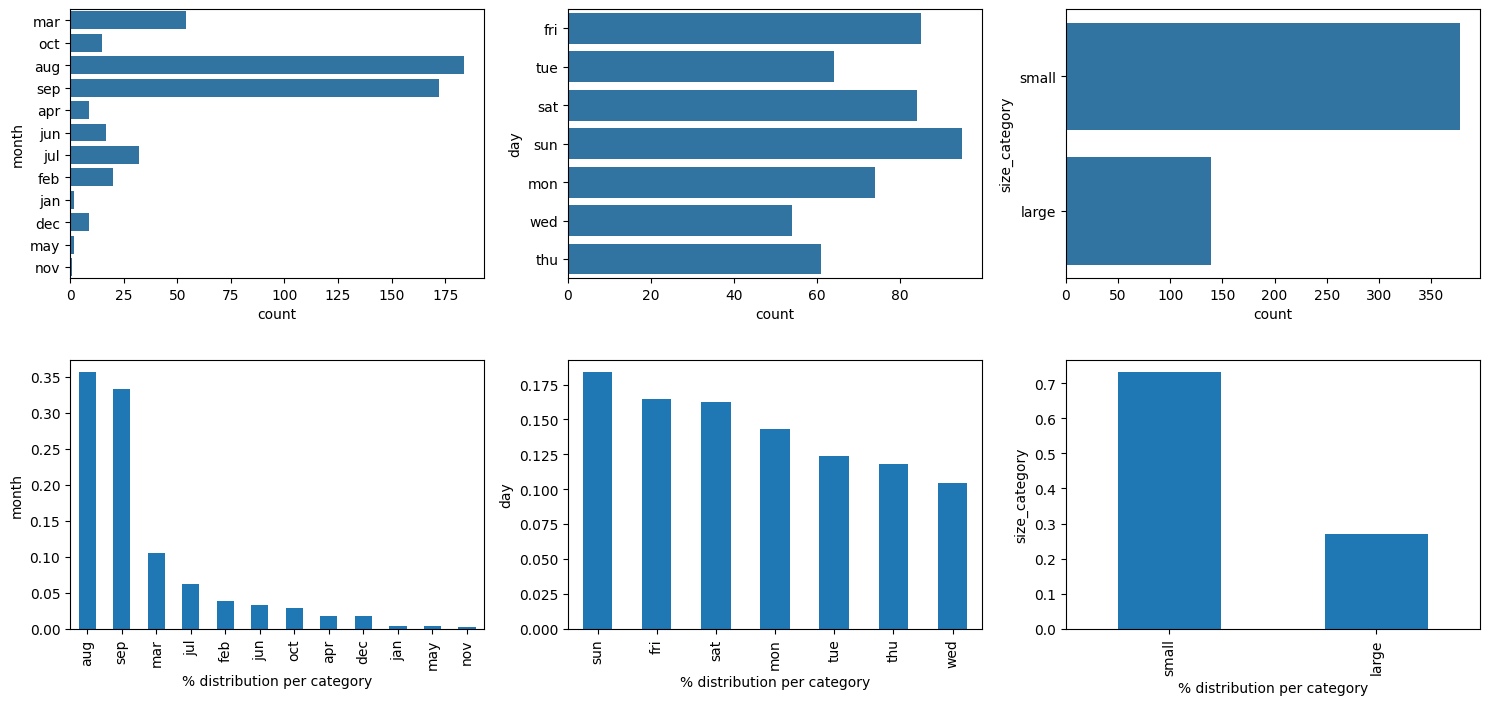

In [20]:
plt.figure(figsize=(15,10))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data=visual_df,y=col)
    plt.subplot(3,3,i+3)
    visual_df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

## Now i will analyze the distribution of continus numerical features
- Considering the features in our dataset  

In [21]:
continus_num_feature = [feature for feature in numerical_features if len(forfire_df[feature].unique()) > 23]
print(continus_num_feature)

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'area']


+ Univariate plot for the continus Feature

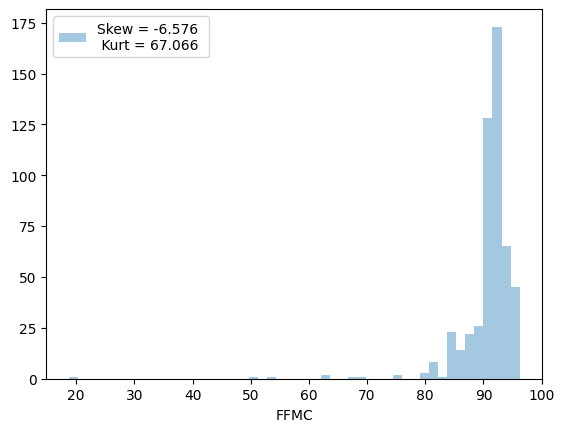

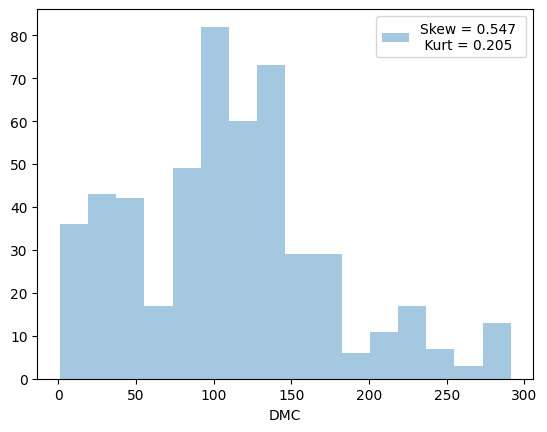

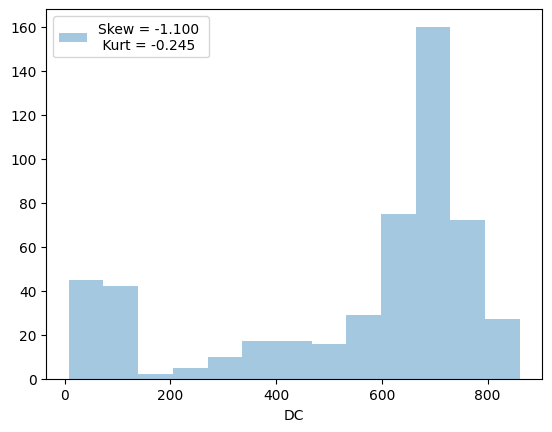

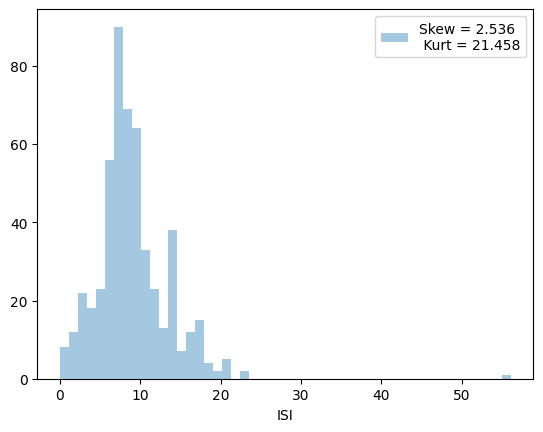

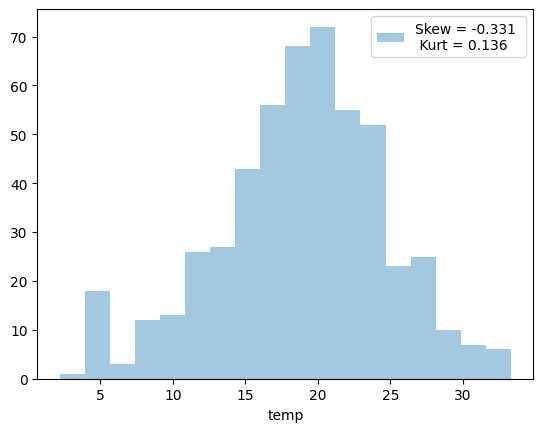

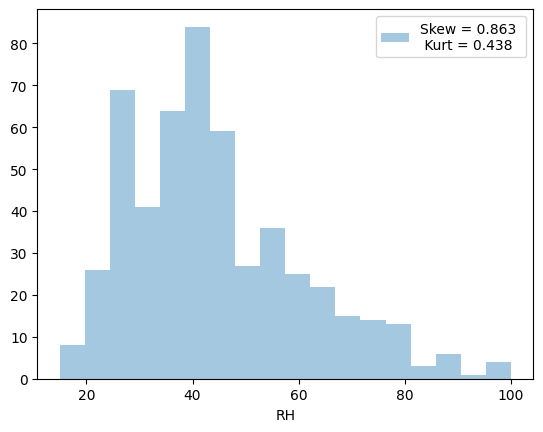

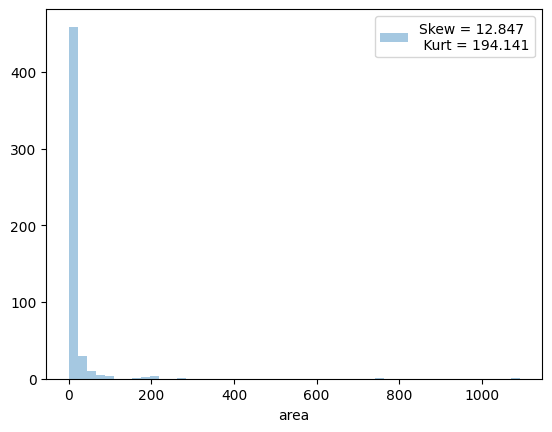

In [22]:
for feature in continus_num_feature:
    skew = forfire_df[feature].skew()
    kurt = forfire_df[feature].kurt()
    sns.distplot(forfire_df[feature], kde= False, label='Skew = %.3f \n Kurt = %.3f' %(skew,kurt))
    plt.legend(loc='best')
    plt.show()

+ From the plot of area it is clear that majority of forest fire are for small area we will analyze it in detail further
+ Data is highly skewed with magnituse of skew being as high as 12.847
+ Data also has a very high Kurtosis Value of 194.141

# Lets now Detect the outliers in our numerical Data

In [23]:
print(continus_num_feature)

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'area']


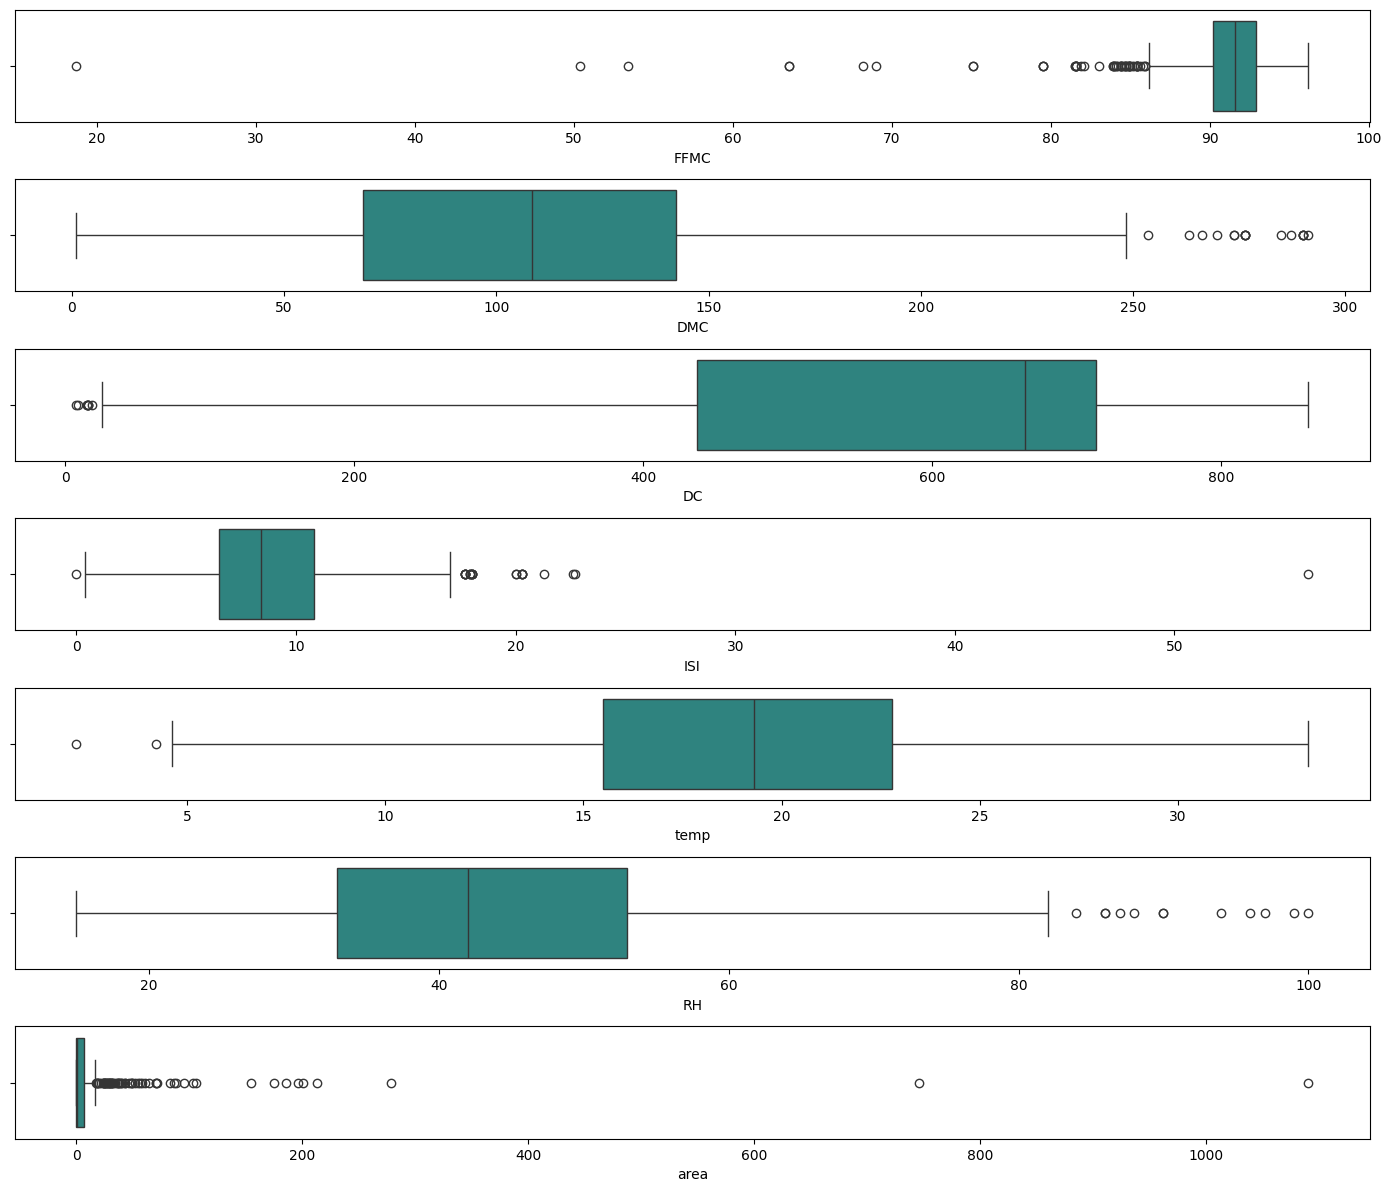

In [24]:
outlier_data = forfire_df.copy()
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
for i in range(len(continus_num_feature)):
  sns.boxplot(x=continus_num_feature[i],palette='viridis',data=outlier_data,ax=axes[i])
plt.tight_layout(pad=1.0)

* There are a lot of outlier in the Data and they are in a large number hence cannot be dropped. As it will render our model built unsuitable for the Dataset.

* Hence i take logarithmic tranformation for the continus numerical columns.

In [25]:
data = outlier_data.copy()
for feature in continus_num_feature:
  data[feature] = np.log(data[feature])

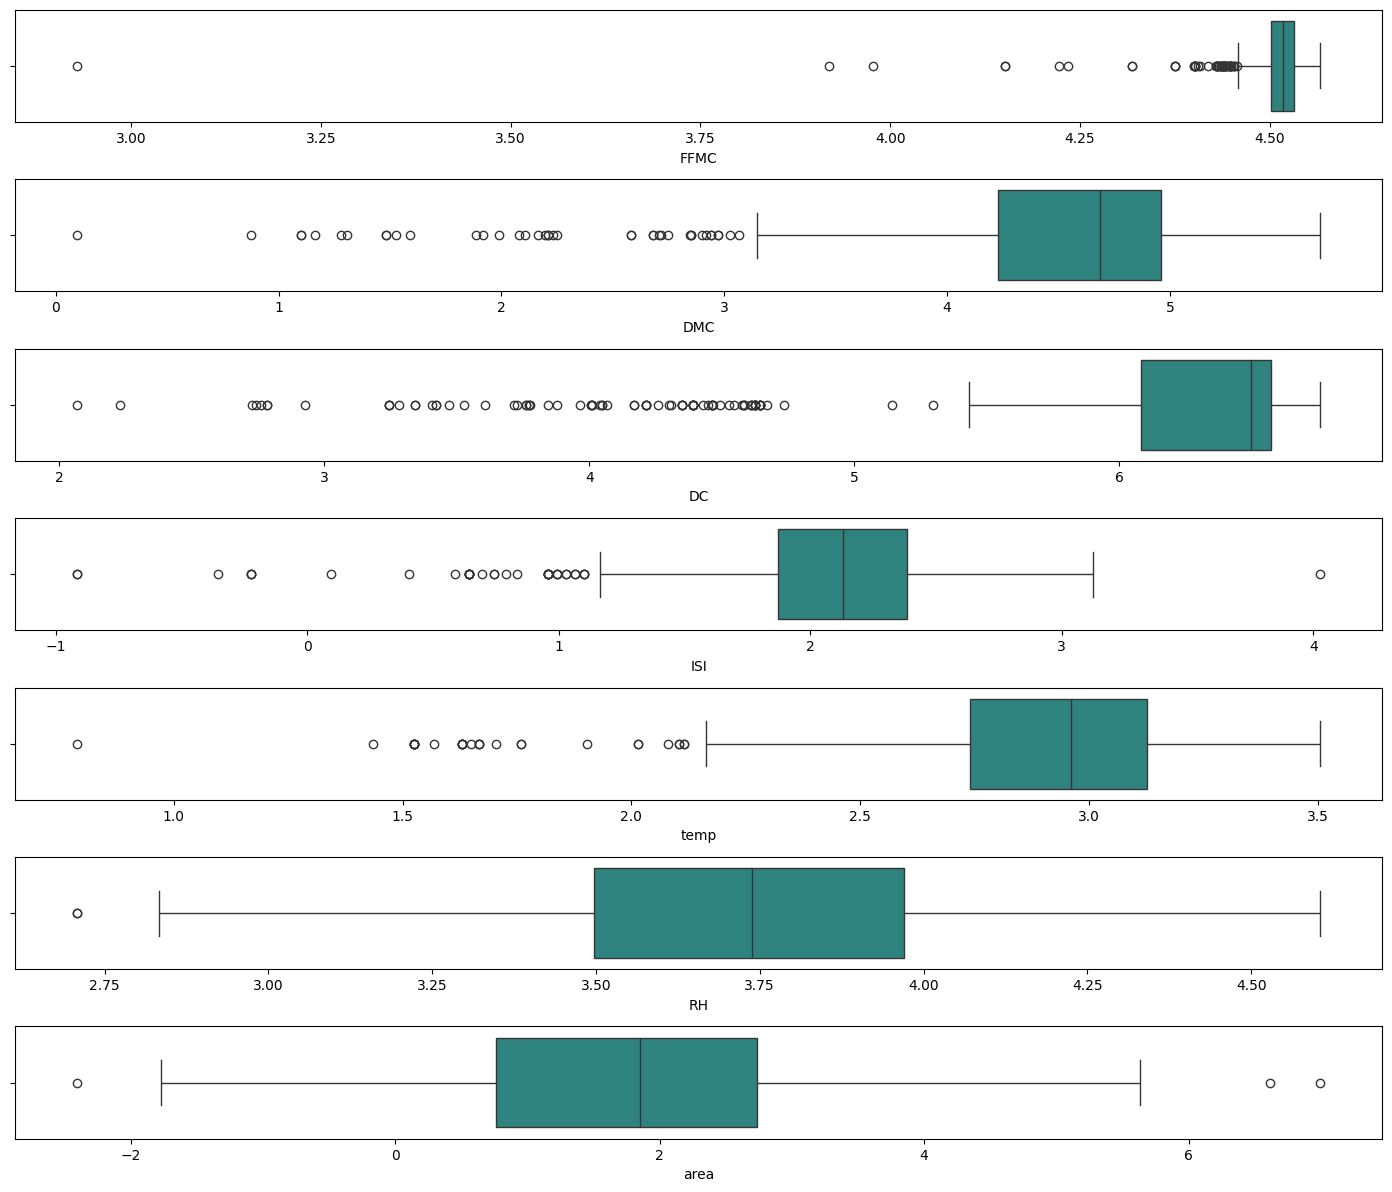

In [26]:
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
for i in range(len(continus_num_feature)):
  sns.boxplot(x=continus_num_feature[i],palette='viridis',data=data,ax=axes[i])
plt.tight_layout(pad=1.0)

## Now we visualize the distribution of Area

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


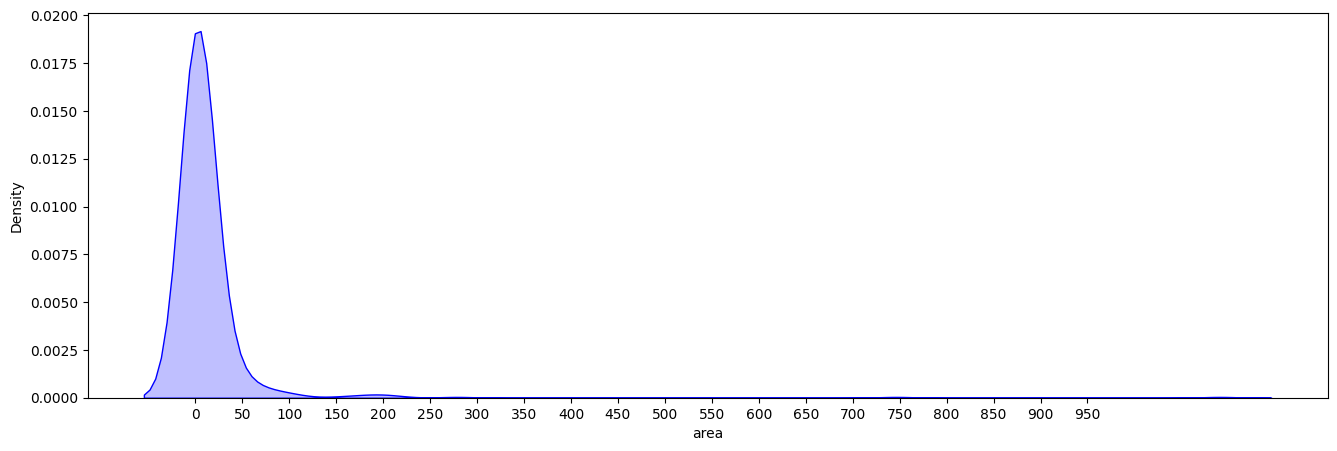

In [27]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(visual_df['area'].skew()))
print("Kurtosis: {}".format(visual_df['area'].kurtosis()))
ax = sns.kdeplot(visual_df['area'],shade=True,color='b')
plt.xticks([i for i in range(0,1000,50)])
plt.show()

Skew: nan
Kurtosis: nan


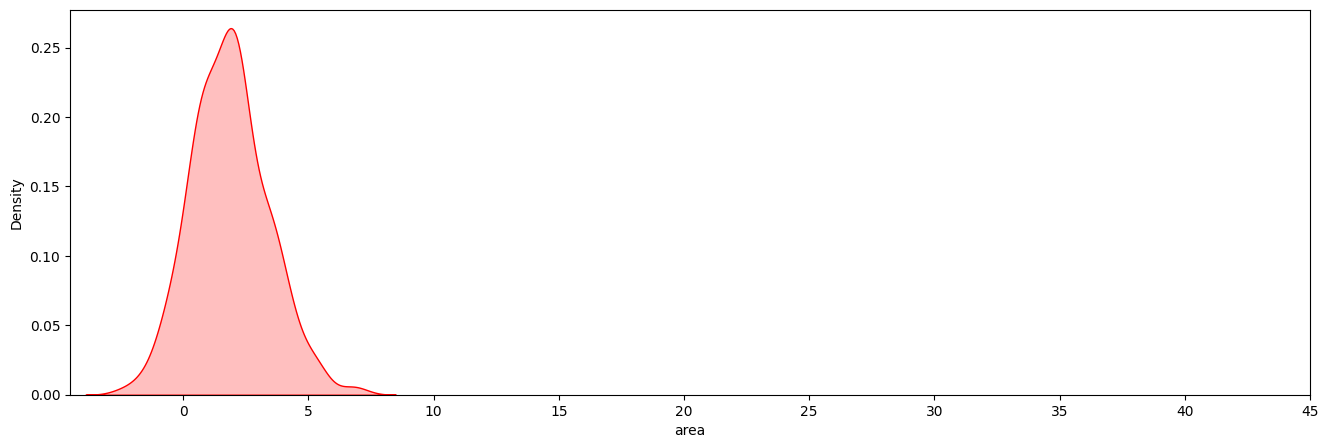

In [28]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(data['area'].skew()))
print("Kurtosis: {}".format(data['area'].kurtosis()))
ax = sns.kdeplot(data['area'],shade=True,color='r')
plt.xticks([i for i in range(0,50,5)])
plt.show()

## As it can be seen from the above two KDE plot that the area had a high value of skewness and Kurtosis but by taking the logarithmic transformation the problem of skewness and kurtosis has been dealt


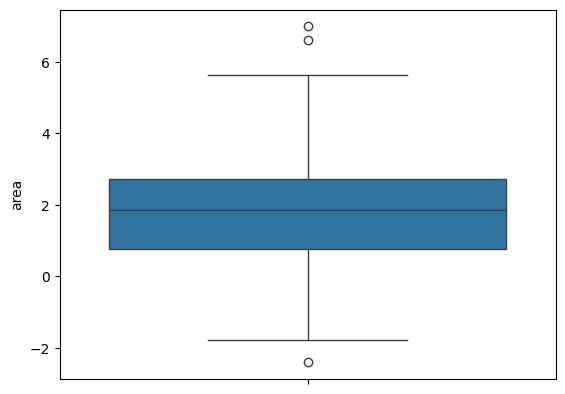

In [29]:
ax = sns.boxplot(data['area'])


#### Further it can also be seen that majority of the area feature is Small and our feature "Size_category" has some distribution distribution which we will explore further

##### Next we see the Monthly analysis of area Burnt

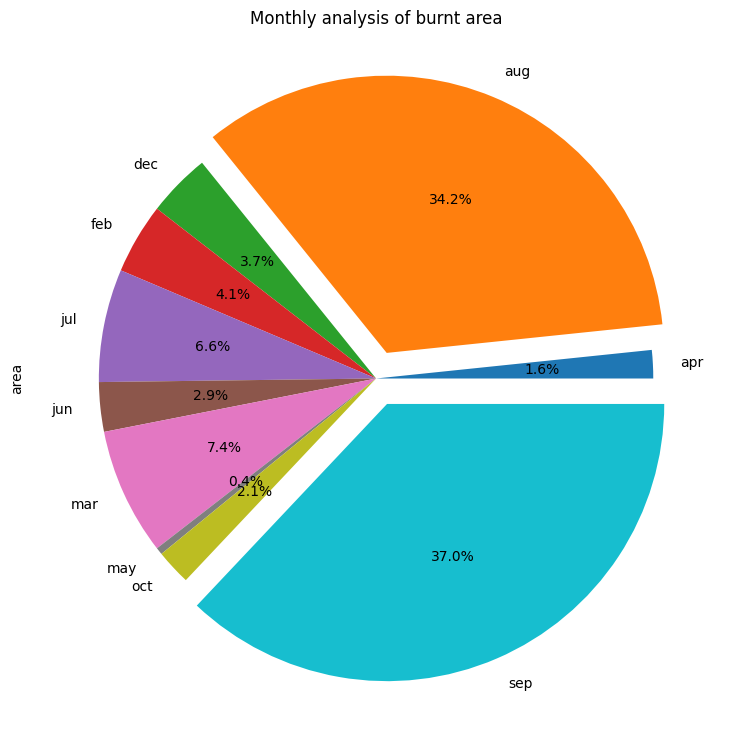

In [30]:
# monthly analysis of burnt area, where the condition is: area>0
areaburnt=data[data['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.1,0,0,0,0,0,0,0,0.1],autopct='%0.1f%%')
plt.show()

**Observations** :-


*   We can see that % area burnt is largest for september followed by August
*   Least burnt area is for the month of may



## Now we vizualize the variable size_category

In [31]:
data['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

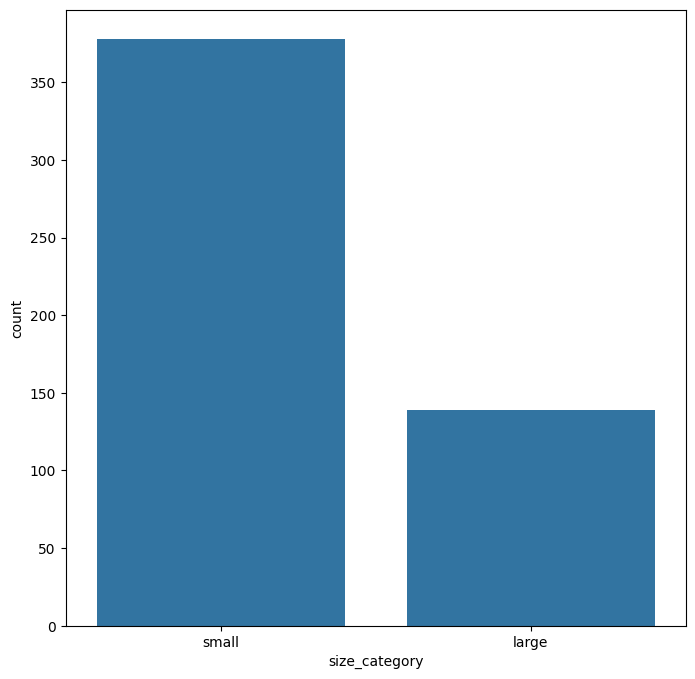

In [32]:
plt.figure(figsize= (8,8))
sns.countplot(x=data['size_category'])
plt.show()

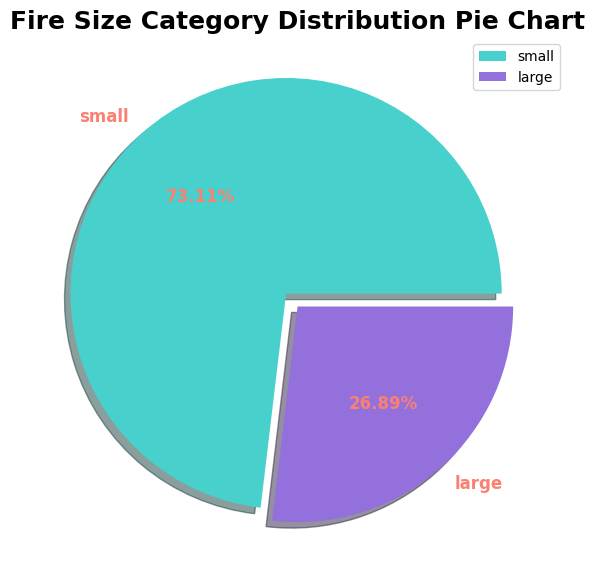

In [33]:
plt.figure(figsize = (12,7))
plt.pie(data['size_category'].value_counts(),
       labels=data['size_category'].unique(),
       explode = [0.08,0.0],
       autopct= '%.2f%%',
        colors = ["#48d1cc", "#9370db"],
       shadow= True,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'#fa8072'})
plt.legend(loc= 'upper right')
plt.title("Fire Size Category Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

### Further, based on the distribution of 'Area' in the Dataframe;

## We know that 73.11 % of the Data points is small area as per the 'Size_category' which i will use as dependent variable

##  before we can use the column 'size_category' as dependent variable we need to know the limits for 'small' and 'large' categories of area based percentage of data points

In [34]:
threshold_area = visual_df['area'].quantile(.7311)
print(f"The Threshold area for the 'size_category' is {round(threshold_area,2)}")

The Threshold area for the 'size_category' is 5.99


## Now we know that area less than 6 units is considered as Small Area and Area greater than 6 units is large area. Using map to make the dependent variable suitable for algorithmn
{'small':0, 'large':1}

In [35]:
df = forfire_df.copy()
df.head(3)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small


In [36]:
df['size_category'] = df['size_category'].map({'small':0, 'large':1})
df.head(3)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0


## Seperating Data set into dependent and Independent Features before Feature Selection

## First drop features 'month','day','area' to make dataframe suitable for K-best algorithm inorder to visualize the influence of every independent featrure on dependent one

In [37]:
df1 = df.drop(['month','day','area'],axis=1)
df1.head(3)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
Y = df1['size_category']
X = df1.drop('size_category',axis=1)

## Selection of the K-Best Features

In [39]:
# feature extraction and Summerizing the scores
criteria = SelectKBest(score_func=chi2, k=4)
kfeat = criteria.fit(X,Y)
scores = kfeat.scores_           # Summarize scores
features = kfeat.transform(X)

In [40]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Influence', 'Feature'])
score_df.sort_values(by="Influence", ascending=False, inplace=True)
score_df

,Influence,Feature
1,23.006108,DMC
2,21.872657,DC
17,17.601210,monthdec
5,6.350054,RH
7,5.216072,rain
6,1.440661,wind
16,1.157358,monthaug
12,0.964276,daythu
21,0.738170,monthjun
19,0.735450,monthjan


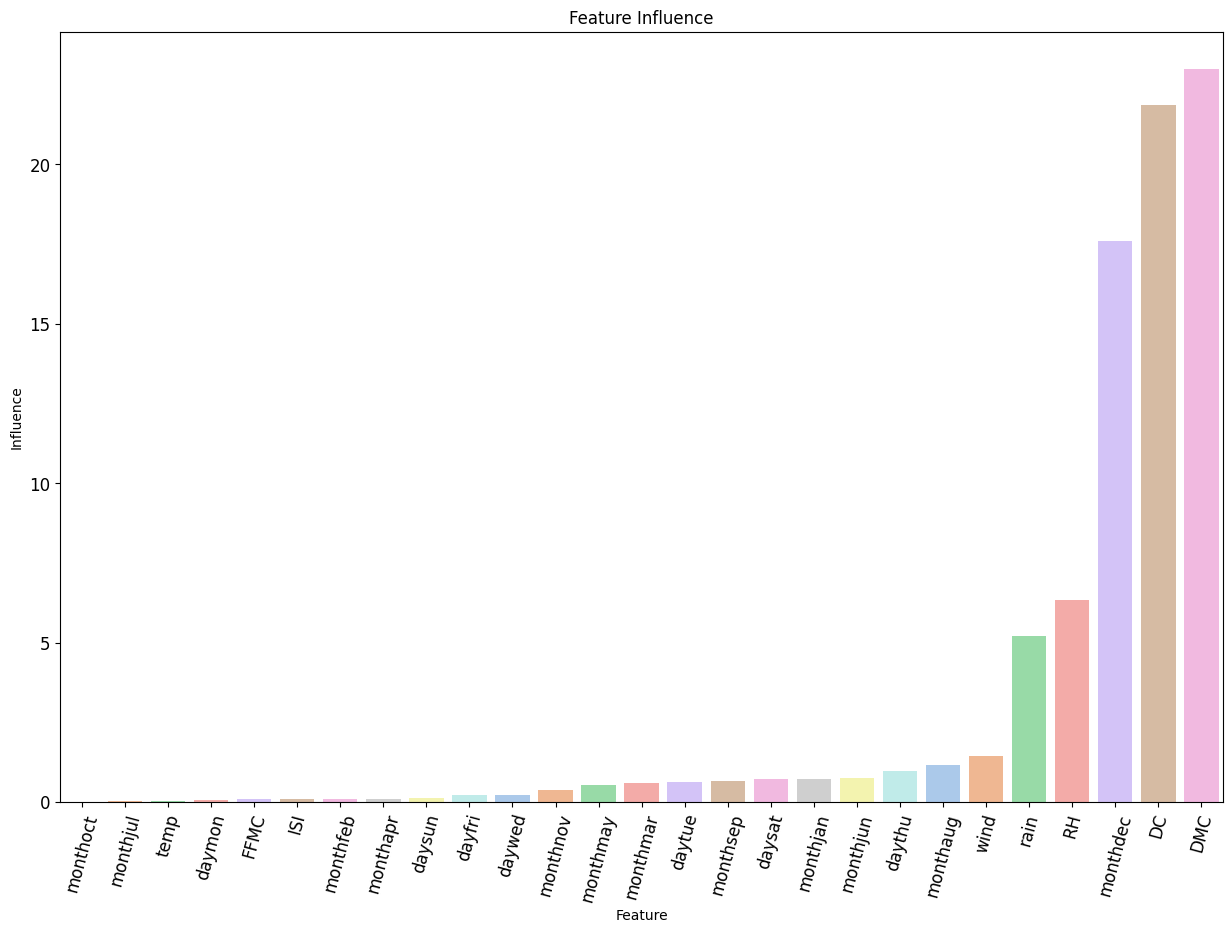

In [41]:
plt.figure(figsize=(15,10))
sns.barplot(x='Feature',y='Influence',
            data=score_df,order=score_df.sort_values('Influence').Feature,palette='pastel')
plt.yticks(fontsize=12,rotation=0)
plt.xticks(fontsize=12,rotation=75)
plt.title("Feature Influence")
plt.show()

In [42]:
model_data=df[['DMC','DC','RH','rain','wind','area','monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan',
       'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep','size_category']]
model_data.head(3)

,DMC,DC,RH,rain,wind,area,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,26.2,94.3,51,0.0,6.7,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,35.4,669.1,33,0.0,0.9,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,43.7,686.9,33,0.0,1.3,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [43]:
model_data.shape

(517, 19)

## Data scaling, train test split and seperation of dependent and Independent variable

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
model_data[['DMC','DC','RH','rain','wind','area']] = scaler.fit_transform(model_data[['DMC','DC','RH','rain','wind','area']])
model_data.head()

,DMC,DC,RH,rain,wind,area,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-1.323326,-1.830477,0.411724,-0.073268,1.498614,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,0
1,-1.179541,0.488891,-0.692456,-0.073268,-1.741756,-0.20202,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-1.049822,0.560715,-0.692456,-0.073268,-1.518282,-0.20202,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-1.212361,-1.898266,3.233519,0.603155,-0.009834,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-0.931043,-1.798600,3.356206,-0.073268,-1.238940,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,0


In [46]:
y = model_data['size_category']
x = model_data.drop('size_category',axis=1)
print(x.head(1))
print(y.head(1))

        DMC        DC        RH      rain      wind     area  monthapr  \
0 -1.323326 -1.830477  0.411724 -0.073268  1.498614 -0.20202         0   

   monthaug  monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  \
0         0         0         0         0         0         0         1   

   monthmay  monthnov  monthoct  monthsep  
0         0         0         0         0  
0    0
Name: size_category, dtype: int64


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Hyperparameter Tuning: Optimal Learning rate ,Number of Layers and Number of  Neurons

In [48]:
def build_model(hypt):
    model =Sequential()
    for i in range(hypt.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hypt.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hypt.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [49]:
!pip install keras_tuner

In [50]:
from keras_tuner import RandomSearch
tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=6,  executions_per_trial=6,directory='project',project_name='Forest Fire')

Reloading Tuner from project/Forest Fire/tuner0.json


In [51]:
tuner.search_space_summary()

Search space summary
Default search space size: 19
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_6

In [52]:
tuner.search(X_train,Y_train,epochs=100,validation_data=(X_test, Y_test))

In [53]:
tuner.results_summary() # Shows most Optimal combinations of Learning rate ,Number of Layers and Number of  Neurons

Results summary
Results in project/Forest Fire
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
num_layers: 5
units_0: 32
units_1: 64
learning_rate: 0.01
units_2: 64
units_3: 96
units_4: 64
units_5: 96
units_6: 64
units_7: 32
units_8: 64
units_9: 32
units_10: 96
units_11: 64
units_12: 32
units_13: 32
units_14: 32
Score: 0.9855769276618958

Trial 4 summary
Hyperparameters:
num_layers: 17
units_0: 96
units_1: 96
learning_rate: 0.01
units_2: 64
units_3: 96
units_4: 64
units_5: 32
units_6: 64
units_7: 64
units_8: 96
units_9: 64
units_10: 32
units_11: 64
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
Score: 0.9583333333333334

Trial 2 summary
Hyperparameters:
num_layers: 15
units_0: 96
units_1: 96
learning_rate: 0.0001
units_2: 64
units_3: 64
units_4: 32
units_5: 96
units_6: 64
units_7: 32
units_8: 96
units_9: 64
units_10: 96
units_11: 32
units_12: 32
units_13: 32
units_14: 64
Score: 0.9455128212769827

Trial 5 summar

**Hyperparameter Tuning**: Optimal Batch_size, Number of Epochs

In [54]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(64,input_dim=18,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(units=1,activation="sigmoid"))

    adam=Adam(learning_rate=0.01)
    model1.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model1

In [55]:
!pip install tensorflow==2.12.0

In [57]:
!pip install scikeras

from scikeras.wrappers import KerasClassifier

In [58]:
model1 =KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [61]:
grid_result = grid.fit(X_test,Y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=0.762 total time=   1.4s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=0.857 total time=   1.1s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.857 total time=   1.1s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=0.810 total time=   1.1s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................


[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=0.800 total time=   1.1s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................


[CV 1/5; 2/16] END ....batch_size=10, epochs=50;, score=0.762 total time=   1.8s
[CV 2/5; 2/16] START batch_size=10, epochs=50...................................
[CV 2/5; 2/16] END ....batch_size=10, epochs=50;, score=0.857 total time=   3.5s
[CV 3/5; 2/16] START batch_size=10, epochs=50...................................
[CV 3/5; 2/16] END ....batch_size=10, epochs=50;, score=0.905 total time=   2.0s
[CV 4/5; 2/16] START batch_size=10, epochs=50...................................
[CV 4/5; 2/16] END ....batch_size=10, epochs=50;, score=0.857 total time=   2.0s
[CV 5/5; 2/16] START batch_size=10, epochs=50...................................
[CV 5/5; 2/16] END ....batch_size=10, epochs=50;, score=0.750 total time=   2.1s
[CV 1/5; 3/16] START batch_size=10, epochs=100..................................
[CV 1/5; 3/16] END ...batch_size=10, epochs=100;, score=0.810 total time=   3.9s
[CV 2/5; 3/16] START batch_size=10, epochs=100..................................
[CV 2/5; 3/16] END ...batch_

In [62]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.8647619047619047, using {'batch_size': 40, 'epochs': 200}
0.8171428571428571,0.03634054100635982 with {'batch_size': 10, 'epochs': 10}
0.8261904761904763,0.060045334347230916 with {'batch_size': 10, 'epochs': 50}
0.8366666666666666,0.022314999074018987 with {'batch_size': 10, 'epochs': 100}
0.8266666666666665,0.049450495183798744 with {'batch_size': 10, 'epochs': 200}
0.8166666666666667,0.05812645531301763 with {'batch_size': 20, 'epochs': 10}
0.8452380952380952,0.051065739498874316 with {'batch_size': 20, 'epochs': 50}
0.8261904761904763,0.060045334347230916 with {'batch_size': 20, 'epochs': 100}
0.8161904761904761,0.07435893827025958 with {'batch_size': 20, 'epochs': 200}
0.7585714285714286,0.05831340767558717 with {'batch_size': 40, 'epochs': 10}
0.8261904761904763,0.06717493323650423 with {'batch_size': 40, 'epochs': 50}
0.8361904761904763,0.049815987926179126 with {'batch_size': 40, 'epochs': 100}
0.8647619047619047,0.057585586506022725 with {'batch_size': 40, 'epochs': 200

# Hyperparameter Tuning: Optimal Droupout rate

In [79]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(64,input_dim=18,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(units=1,activation="sigmoid"))

    adam=Adam(lr=0.01)
    model2.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model2

In [80]:
model2=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [81]:
grid_result2 = grid2.fit(X_test,Y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................
[CV 1/5; 1/6] END .............dropout_rate=0.0;, score=0.810 total time=   2.8s
[CV 2/5; 1/6] START dropout_rate=0.0............................................
[CV 2/5; 1/6] END .............dropout_rate=0.0;, score=0.857 total time=   4.2s
[CV 3/5; 1/6] START dropout_rate=0.0............................................
[CV 3/5; 1/6] END .............dropout_rate=0.0;, score=0.952 total time=   3.8s
[CV 4/5; 1/6] START dropout_rate=0.0............................................
[CV 4/5; 1/6] END .............dropout_rate=0.0;, score=0.905 total time=   3.0s
[CV 5/5; 1/6] START dropout_rate=0.0............................................


[CV 5/5; 1/6] END .............dropout_rate=0.0;, score=0.750 total time=   2.8s
[CV 1/5; 2/6] START dropout_rate=0.1............................................


[CV 1/5; 2/6] END .............dropout_rate=0.1;, score=0.762 total time=   3.5s
[CV 2/5; 2/6] START dropout_rate=0.1............................................
[CV 2/5; 2/6] END .............dropout_rate=0.1;, score=0.857 total time=   3.7s
[CV 3/5; 2/6] START dropout_rate=0.1............................................
[CV 3/5; 2/6] END .............dropout_rate=0.1;, score=0.905 total time=   3.5s
[CV 4/5; 2/6] START dropout_rate=0.1............................................
[CV 4/5; 2/6] END .............dropout_rate=0.1;, score=0.810 total time=   2.8s
[CV 5/5; 2/6] START dropout_rate=0.1............................................
[CV 5/5; 2/6] END .............dropout_rate=0.1;, score=0.750 total time=   6.0s
[CV 1/5; 3/6] START dropout_rate=0.2............................................
[CV 1/5; 3/6] END .............dropout_rate=0.2;, score=0.762 total time=   3.4s
[CV 2/5; 3/6] START dropout_rate=0.2............................................
[CV 2/5; 3/6] END ..........

In [82]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.8552381038665772, using {'dropout_rate': 0.4}
0.8547619104385376,0.07079080374958549 with {'dropout_rate': 0.0}
0.8166666746139526,0.05812645526651305 with {'dropout_rate': 0.1}
0.8457142949104309,0.0711167755805171 with {'dropout_rate': 0.2}
0.8447619080543518,0.08123759858729188 with {'dropout_rate': 0.3}
0.8552381038665772,0.03321065663794324 with {'dropout_rate': 0.4}
0.8266666769981384,0.04945049223631954 with {'dropout_rate': 0.5}


**Hyperparameter Tuning: Optimal Activation Function and Kernel Initializer**

In [83]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(64,input_dim=18,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.0))
    model3.add(Dense(units=1,activation="sigmoid"))

    adam=Adam(lr=0.01)
    model3.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model3

In [84]:
model3=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

In [86]:
grid_result3 = grid3.fit(X_test,Y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................
[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=0.762 total time=   4.1s
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................
[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=0.857 total time=   3.4s
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................
[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=0.905 total time=   3.5s
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................
[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=0.857 total time=   3.7s
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................
[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=0.750 total time=   2.8s
[CV 1/5; 2/9] START activation_function=softmax, init=uniform..............

In [87]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.8552381038665772, using {'activation_function': 'softmax', 'init': 'uniform'}
0.8261904835700988,0.060045334549814915 with {'activation_function': 'softmax', 'init': 'normal'}
0.8552381038665772,0.03321065663794324 with {'activation_function': 'softmax', 'init': 'uniform'}
0.8166666746139526,0.07206069346400552 with {'activation_function': 'softmax', 'init': 'zero'}
0.8071428656578064,0.04542567729932745 with {'activation_function': 'tanh', 'init': 'normal'}
0.8457142949104309,0.03780844201554436 with {'activation_function': 'tanh', 'init': 'uniform'}
0.8361904859542847,0.04981598495691486 with {'activation_function': 'tanh', 'init': 'zero'}
0.8452381014823913,0.051065742013280895 with {'activation_function': 'relu', 'init': 'normal'}
0.8452381014823913,0.059285237434783665 with {'activation_function': 'relu', 'init': 'uniform'}
0.8166666746139526,0.039555354393387955 with {'activation_function': 'relu', 'init': 'zero'}


**Building Neural Networks Model using Optimal Values**

In [88]:
def FindBestParams(x_train, y_train, x_test, y_test):

    #defining list of hyperparameters
    batch_sizes = [5 , 10 , 15 , 20]
    epoch_instaces      = [5 , 10 , 50 , 100]

    # initializing the trials
    for batch_trial in batch_sizes:
        for epochs_trial in epoch_instaces:

            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))

            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])

            # Fitting the ANN to the Training set
            model_trained = model.fit(x_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)

             # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]

            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
FindBestParams(X_train, Y_train, X_test, Y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.8571428656578064
batch_size: 5 - epochs: 10 Accuracy: 0.9757869243621826
batch_size: 5 - epochs: 50 Accuracy: 0.9854721426963806
batch_size: 5 - epochs: 100 Accuracy: 0.9878934621810913
batch_size: 10 - epochs: 5 Accuracy: 0.7796609997749329
batch_size: 10 - epochs: 10 Accuracy: 0.8983050584793091
batch_size: 10 - epochs: 50 Accuracy: 0.9878934621810913
batch_size: 10 - epochs: 100 Accuracy: 0.9878934621810913
batch_size: 15 - epochs: 5 Accuracy: 0.7627118825912476
batch_size: 15 - epochs: 10 Accuracy: 0.8547215461730957
batch_size: 15 - epochs: 50 Accuracy: 0.9927361011505127
batch_size: 15 - epochs: 100 Accuracy: 0.9927361011505127
batch_size: 20 - epochs: 5 Accuracy: 0.7554479241371155
batch_size: 20 - epochs: 10 Accuracy: 0.8135592937469482
batch_size: 20 - epochs: 50 Accuracy: 0.9927361011505127
batch_size: 20 - epochs: 100 Accuracy: 0.9927361011505127


## Train Model with Best parameters

In [91]:
 # create ANN model
model = Sequential()
# Defining the first layer of the model
model.add(Dense(units=50, input_dim=X_train.shape[1], kernel_initializer='normal', activation='tanh'))
model.add(Dropout(0.1))
# Defining the Second layer of the model
model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
model.add(Dropout(0.1))
# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model.fit(X_train, Y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
28/28 [==============================] - 1s 11ms/step - loss: 0.6868 - accuracy: 0.7319 - val_loss: 0.6777 - val_accuracy: 0.7664
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6661 - accuracy: 0.7319 - val_loss: 0.6405 - val_accuracy: 0.7737
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6223 - accuracy: 0.7391 - val_loss: 0.5817 - val_accuracy: 0.7737
Epoch 4/100
28/28 [==============================] - 0s 6ms/step - loss: 0.5798 - accuracy: 0.7391 - val_loss: 0.5391 - val_accuracy: 0.7810
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 0.5444 - accuracy: 0.7536 - val_loss: 0.5171 - val_accuracy: 0.7883
Epoch 6/100
28/28 [==============================] - 0s 4ms/step - loss: 0.5242 - accuracy: 0.7572 - val_loss: 0.4968 - val_accuracy: 0.7883
Epoch 7/100
28/28 [==============================] - 0s 4ms/step - loss: 0.5024 - accuracy: 0.7645 - val_loss: 0.4794 - val_accuracy: 0.7956
Epoch 8/100


**Model Evaluation Train and Test Error**

In [92]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9865
accuracy: 98.65%


In [93]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Comparision of the train-set and test-set accuracy

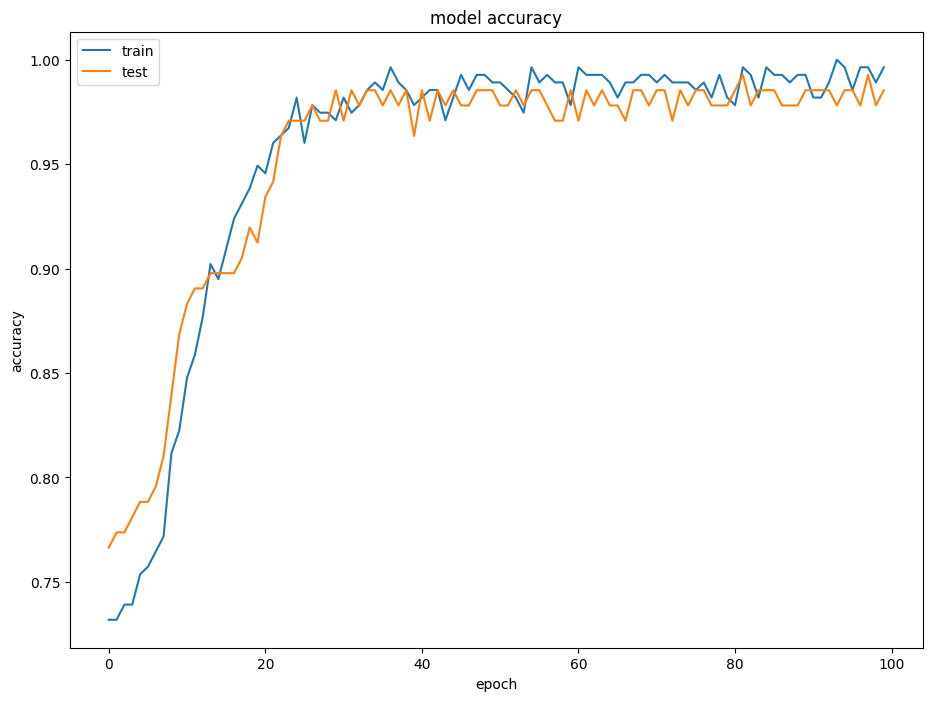

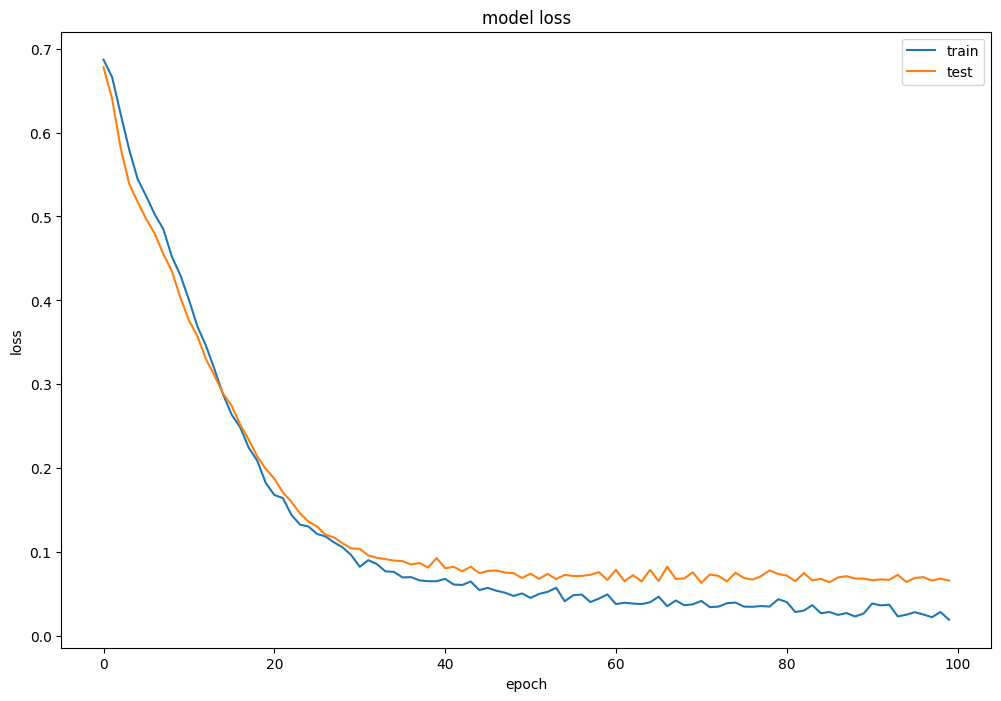

In [95]:
# summarize history for accuracy
plt.figure(figsize=(11,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## Both the Training as well as the Testing accuracy eventually converge, even though computationally expensive i have done a decent amount of hyper parameter tuning of all the parameters

## Predicting values from Model using same dataset

## Prediction comparision for Test Data

In [99]:
y_predict_test = model.predict(X_test)

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = Y_test
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

4/4 [==============================] - 0s 5ms/step
(104, 3)


,Test_Actual,Test_Probability,Test_Predicted
304,0,0.001176,0
501,0,0.001136,0
441,0,0.001979,0
153,0,0.001504,0
503,0,0.001877,0
131,0,0.001363,0
204,1,0.998190,1
512,1,0.280938,0
325,0,0.001252,0
247,0,0.001362,0


## Prediction Comparision for Train Data

In [101]:
y_predict_train = model.predict(X_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = Y_train
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

13/13 [==============================] - 0s 5ms/step
(413, 3)


,Train_Actual,Train_Probability,Train_Predicted
329,0,0.004155,0
173,0,0.004716,0
272,0,0.004234,0
497,1,0.998204,1
182,1,0.934325,1
268,0,0.001289,0
352,0,0.001870,0
117,0,0.001361,0
393,0,0.001311,0
332,1,0.997716,1


## Confusion Matrix For the Train Data

In [102]:
from sklearn.metrics import confusion_matrix

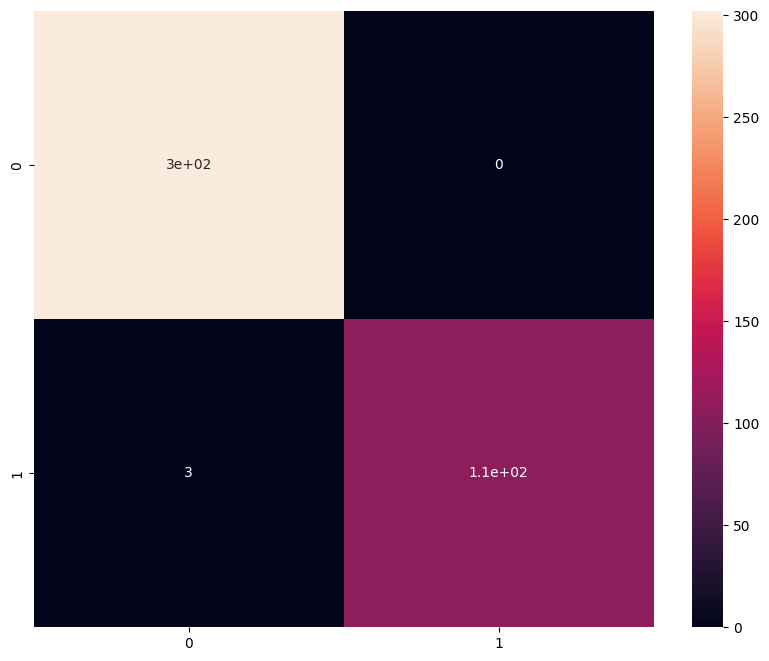

In [105]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(train_prediction.Train_Actual,train_prediction.Train_Predicted),annot=True)
plt.show()

## Confusion Matrix for The Test Data

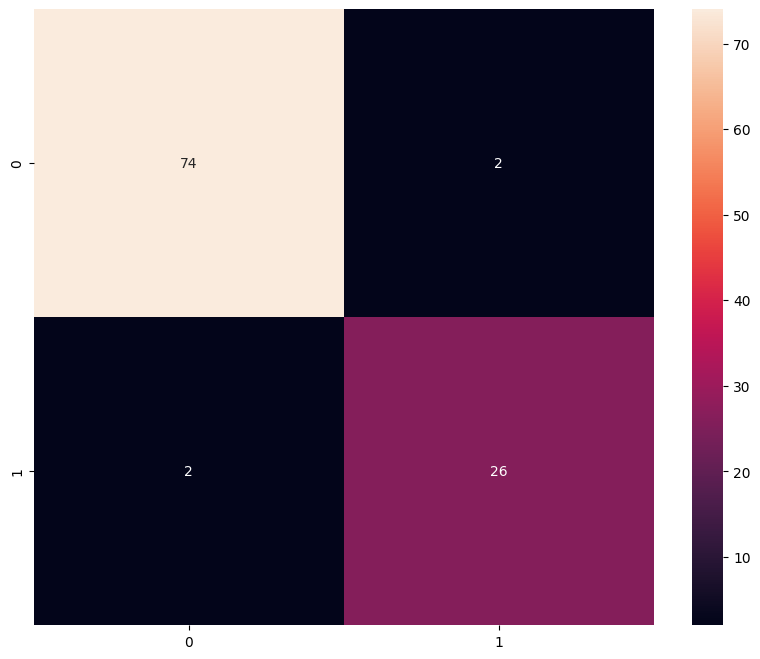

In [106]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(test_prediction.Test_Actual,test_prediction.Test_Predicted),annot=True)
plt.show()

## Classification Report for the Train Data

In [107]:
from sklearn.metrics import classification_report

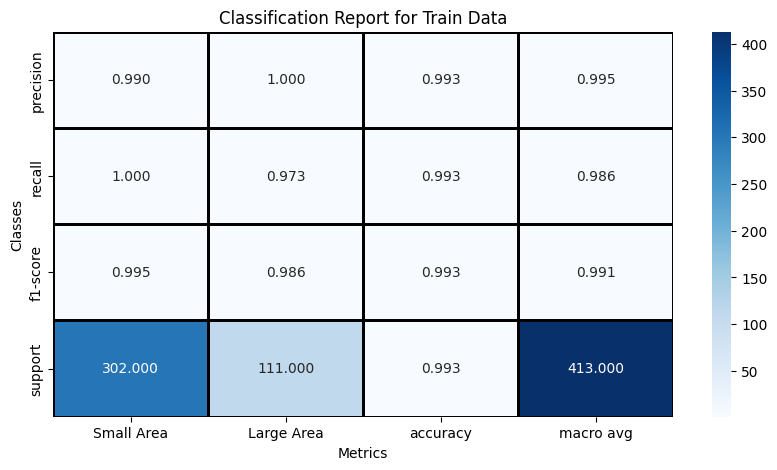

In [109]:
report = classification_report(train_prediction.Train_Actual,train_prediction.Train_Predicted, target_names=['Small Area','Large Area'], output_dict=True)

df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 5))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".3f", linewidths=1, linecolor="black")
plt.title('Classification Report for Train Data')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

## Classification Report for the Test Data

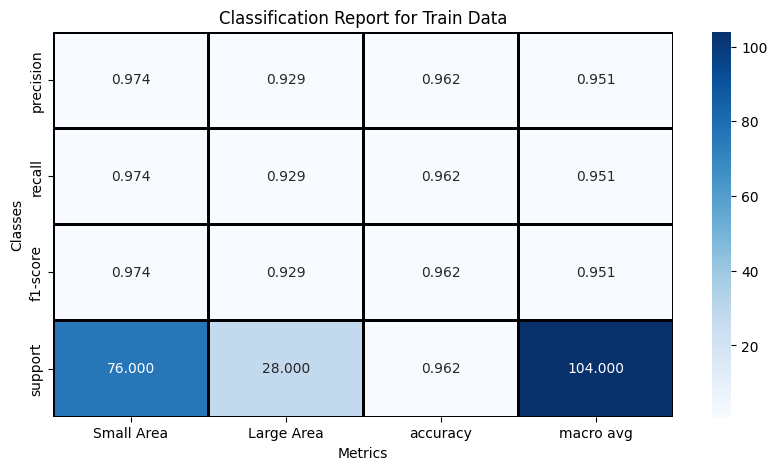

In [110]:
report = classification_report(test_prediction.Test_Actual,test_prediction.Test_Predicted, target_names=['Small Area','Large Area'], output_dict=True)

df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 5))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".3f", linewidths=1, linecolor="black")
plt.title('Classification Report for Train Data')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()